### Random Forest Algorithm

#### 1.Import the libraries.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### 2. Import the dataset

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### 3. Assigning Feature Variable to X and Target variable to y

In [5]:
# Putting feature variable to X
X = df.drop('Outcome', axis=1)

# Putting target variable to y
y = df['Outcome']

In [6]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

#### 4. Perform Train-Test-Split

In [8]:
# lets split the data into train and test
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train.shape, X_test.shape

((537, 8), (231, 8))

#### 5. Import Random Forest Classifier and fit the data

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [13]:
# checking the oob score
# rf_classifier.oob_score_

#### 6. Hyperparameter tuning for Random Forest using GridSearchCV

In [14]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20,25],
    'min_samples_leaf': [5,10,20,50,100,200,250],
    'n_estimators': [10,25,30,50,100,150,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
gscv = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

gscv.fit(X_train, y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 25],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200, 250],
                         'n_estimators': [10, 25, 30, 50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [15]:
gscv.best_score_

np.float64(0.7782969885773625)

In [16]:
rf_best_model = gscv.best_estimator_
rf_best_model

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

#### 7. Visualization

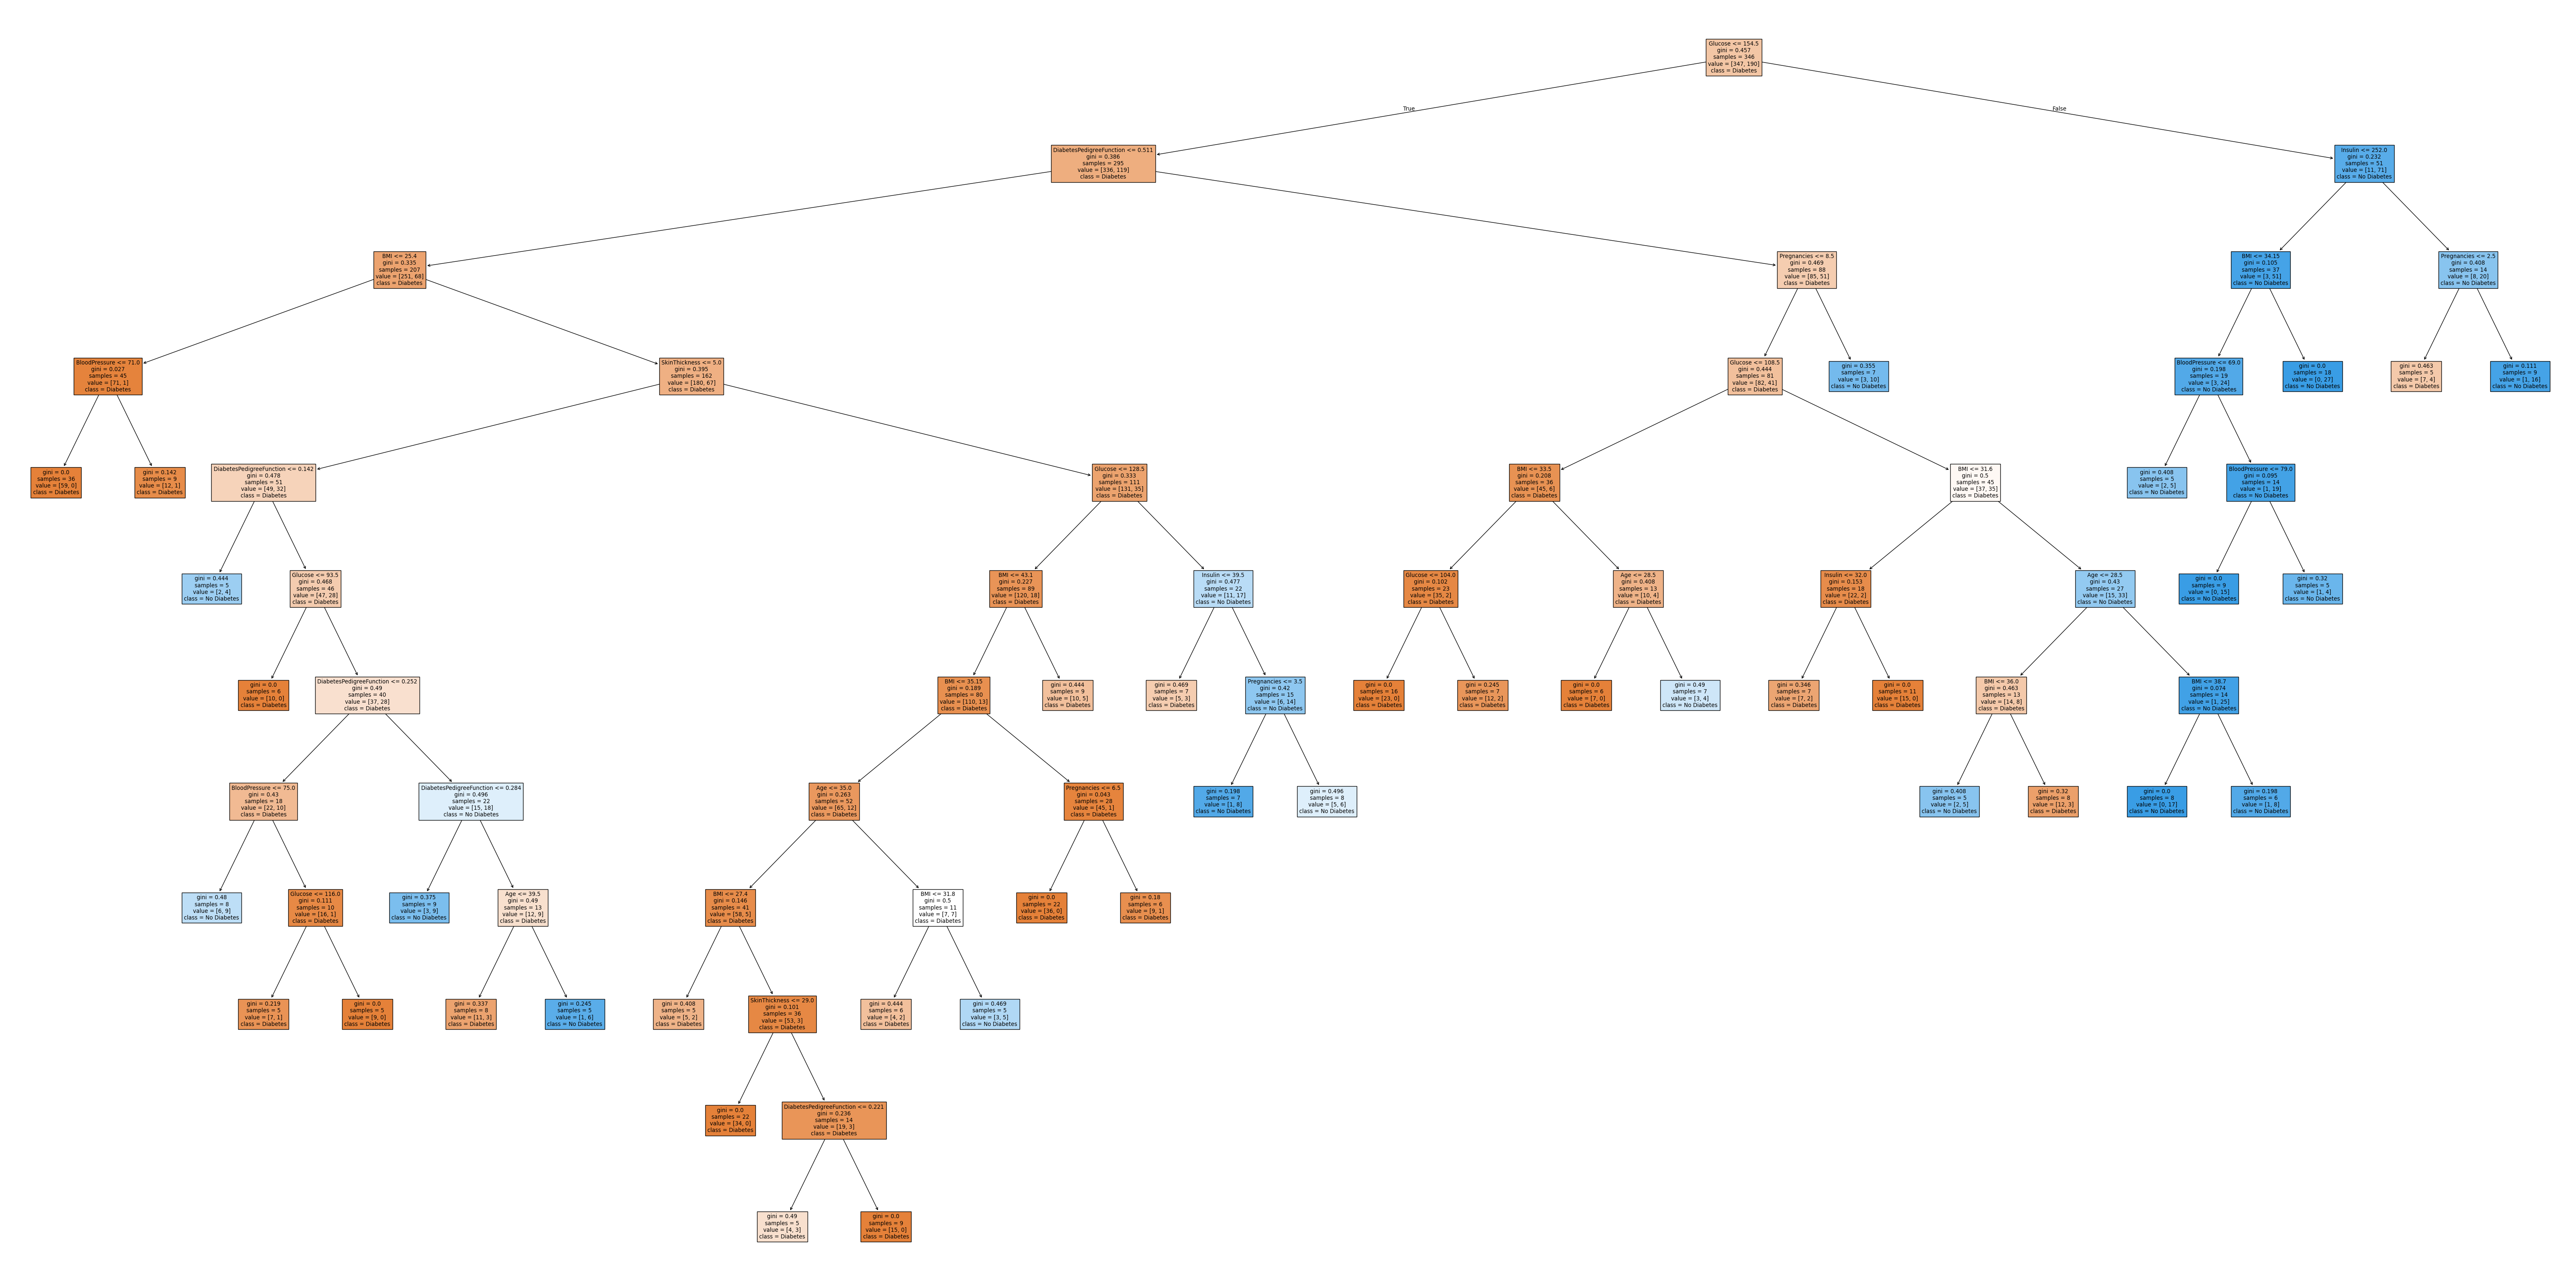

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best_model.estimators_[5], feature_names = X.columns,class_names=['Diabetes', "No Diabetes"],filled=True);
plt.savefig("RF_diabetes_est5.png")

In [16]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best_model.estimators_[7], feature_names = X.columns,class_names=['Diabetes', "No Diabetes"],filled=True);
plt.savefig("RF_diabetes_est7.png")

In [14]:
pwd

'D:\\04-Machine Learning Expert\\Tree based algorithms_DT_RF_GB_XGB\\New folder'

#### 8. Sorting the data with the help of feature importance

In [17]:
rf_best_model.feature_importances_

array([0.07903375, 0.33833242, 0.06424447, 0.05233405, 0.06492389,
       0.18313791, 0.07264431, 0.1453492 ])

In [19]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best_model.feature_importances_
})
imp_df

imp_df.sort_values(by="Imp", ascending=False, ignore_index=True)

,Varname,Imp
0,Glucose,0.338332
1,BMI,0.183138
2,Age,0.145349
3,Pregnancies,0.079034
4,DiabetesPedigreeFunction,0.072644
5,Insulin,0.064924
6,BloodPressure,0.064244
7,SkinThickness,0.052334


#### Key Takeaways

In [29]:
# y_pred = rf_classifier.predict(X_test)

In [30]:
# y_test, len(y_test)

In [27]:
from sklearn.metrics import accuracy_score, classification_report

In [28]:
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.7532467532467533


In [ ]:
# Randomized search cv

In [33]:
rf1 = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': np.arange(1,15),
    'min_samples_leaf': [5,10,20,50,100,200,250],
    'n_estimators': [10,25,30,50,100,150,200]
}

from sklearn.model_selection import RandomizedSearchCV

# Instantiate the Randomized search model
rscv = RandomizedSearchCV(estimator=rf1,
                           param_distributions=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

rscv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_leaf': [5, 10, 20, 50, 100,
                                                             200, 250],
                                        'n_estimators': [10, 25, 30, 50, 100,
                                                         150, 200]},
                   scoring='accuracy', verbose=1)

In [34]:
rscv.best_score_

np.float64(0.7727587400484597)

In [35]:
rscv.best_params_

{'n_estimators': 150, 'min_samples_leaf': 5, 'max_depth': np.int64(11)}

In [31]:
a = np.arange(1,15)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])